<a href="https://colab.research.google.com/github/Jakhongir0103/ML-DL_projects/blob/main/Airline_customer_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold

import scipy
from scipy import stats
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train_dataset.csv", index_col=0)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


#Data analysis

In [3]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

Categorical columns

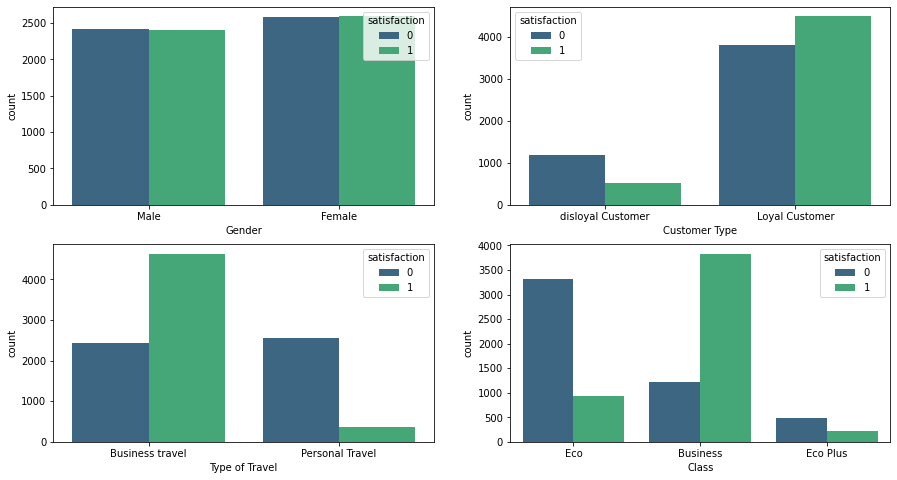

In [55]:
fig, axes = plt.subplots(2,2, figsize=(15,8))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df, ax=axes[0,0])
sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df, ax=axes[0,1])
sns.countplot(x='Type of Travel', hue='satisfaction', palette='viridis', data=df, ax=axes[1,0])
sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df, ax=axes[1,1])

plt.show()

In [ ]:
# Gender columns is well balanced
# Busines travellers tend to be more satisfied
# Busines class travellers tend to be satisfied more, while the Eco class travelers are mostly not satisfied

numerical columns

In [60]:
# I will drop the column 'Gate location', as it does not convey much info
abs(df.corr()[['satisfaction']]).sort_values(by='satisfaction', ascending=False).style.background_gradient(cmap='coolwarm')

,satisfaction
satisfaction,1.000000
Online boarding,0.504986
Inflight entertainment,0.400900
Seat comfort,0.342294
On-board service,0.326426
Leg room service,0.324368
Cleanliness,0.310338
Flight Distance,0.298703
Inflight wifi service,0.277395
Baggage handling,0.247965


In [46]:
# we would fill the nan values of 'Arrival Delay in Minutes' with the exact same value as in the 'Departure Delay in Minutes'
# but as they both convey the same info, I just drop the 'Arrival Delay in Minutes' column
df[df['Arrival Delay in Minutes'].isnull()].head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
143,Male,Loyal Customer,25,Business travel,Business,2685,2,2,2,2,...,4,4,4,4,5,5,5,175,NaN,1
278,Female,Loyal Customer,63,Business travel,Business,3104,3,2,3,3,...,4,4,4,4,4,4,3,0,NaN,1
282,Female,Loyal Customer,40,Business travel,Eco,1214,4,3,3,3,...,4,2,2,4,3,1,4,110,NaN,1
428,Male,Loyal Customer,70,Personal Travel,Eco,298,2,4,2,3,...,1,3,2,4,3,5,1,0,NaN,0
478,Female,Loyal Customer,8,Personal Travel,Business,842,3,5,3,5,...,3,2,5,4,5,1,3,5,NaN,0


#Data preparation for Modeling

In [48]:
y=df[['satisfaction']]
X=df.drop(columns='satisfaction')

X_cat = X[['Gender', 'Customer Type', 'Type of Travel', 'Class']]
X_num = X.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [47]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self, X, y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [50]:
num_pipeline = Pipeline([
          ("column_dropper", columnDropperTransformer(['Arrival Delay in Minutes', 'Gate location'])),
          ('std_scaler', StandardScaler())
])

num_attribs = list(X_num)
cat_attribs = list(X_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [51]:
X_transformed = full_pipeline.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Modeling

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1002
           1       0.90      0.85      0.87       998

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Model accuracy: 0.8775


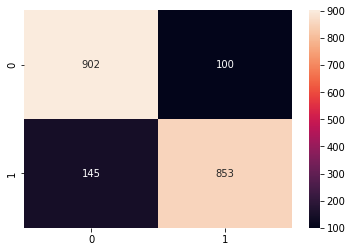

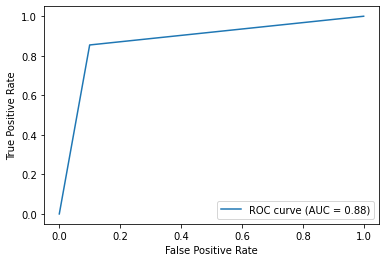

In [98]:
# Model and parameters
LR_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Grid search
parameters = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=LR_model, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy')
LR_grid_result = grid_search.fit(X_train, y_train)

# Model evaluation
y_pred = LR_grid_result.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#### RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model accuracy: 0.9525


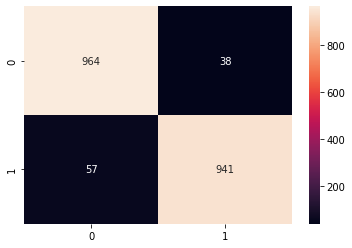

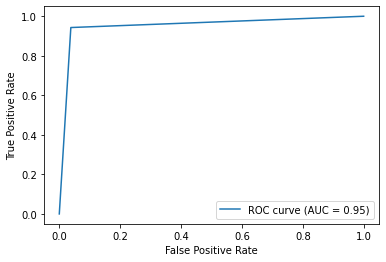

In [99]:
# Models and parameters
rfc_model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# Grid search
parameters = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=rfc_model, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
rfc_grid_result = grid_search.fit(X_train, y_train)

# Model evaluation
y_pred = rfc_grid_result.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#### SVC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1002
           1       0.95      0.93      0.94       998

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model accuracy: 0.94


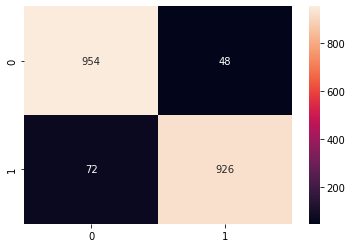

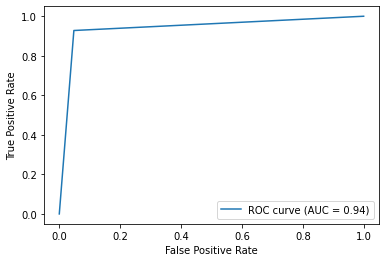

In [100]:
# Model and parameters
svc_model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# Grid search
parameters = dict(kernel=kernel,C=C,gamma=gamma)
grid_search = GridSearchCV(estimator=svc_model, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy')
scv_grid_result = grid_search.fit(X_train, y_train)

# Model evaluation
y_pred = scv_grid_result.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#### XGBClassifier

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Model accuracy: 0.948


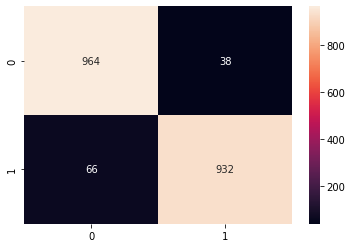

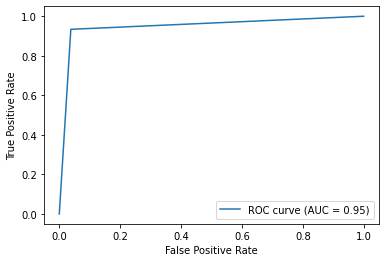

In [101]:
# Model and parameters
xgb_model = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(shuffle = True, n_splits = numFolds)

clf = RandomizedSearchCV(xgb_model, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5,
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)
clf.fit(X_train, y_train)

# Model evaluation
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model accuracy:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Save

In [102]:
df_test = pd.read_csv("test_dataset.csv", index_col=0)
df_test_transformed = full_pipeline.fit_transform(df_test)

In [105]:
satisf_pred = rfc_grid_result.predict(df_test_transformed)
satisf_pred

array([0, 1, 1, ..., 0, 1, 0])

In [106]:
output = pd.DataFrame({'Id': df_test.index, 'satisfaction': satisf_pred})
output.to_csv('submission.csv', index=False)